In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '../data/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(path)

# Data preprocessing
df = df[["Name", "Platform", "Genre", "Critic_Score", "User_Score", "Global_Sales", "Rating"]]
df["User_Score"].replace("tbd", np.nan, inplace=True)
df["Critic_Score"].replace("tbd", np.nan, inplace=True)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(5)

,Name,Platform,Genre,Critic_Score,User_Score,Global_Sales,Rating
0,Wii Sports,Wii,Sports,76.0,8,82.53,E
1,Mario Kart Wii,Wii,Racing,82.0,8.3,35.52,E
2,Wii Sports Resort,Wii,Sports,80.0,8,32.77,E
3,New Super Mario Bros.,DS,Platform,89.0,8.5,29.80,E
4,Wii Play,Wii,Misc,58.0,6.6,28.92,E


d:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Rating', ylabel='count'>

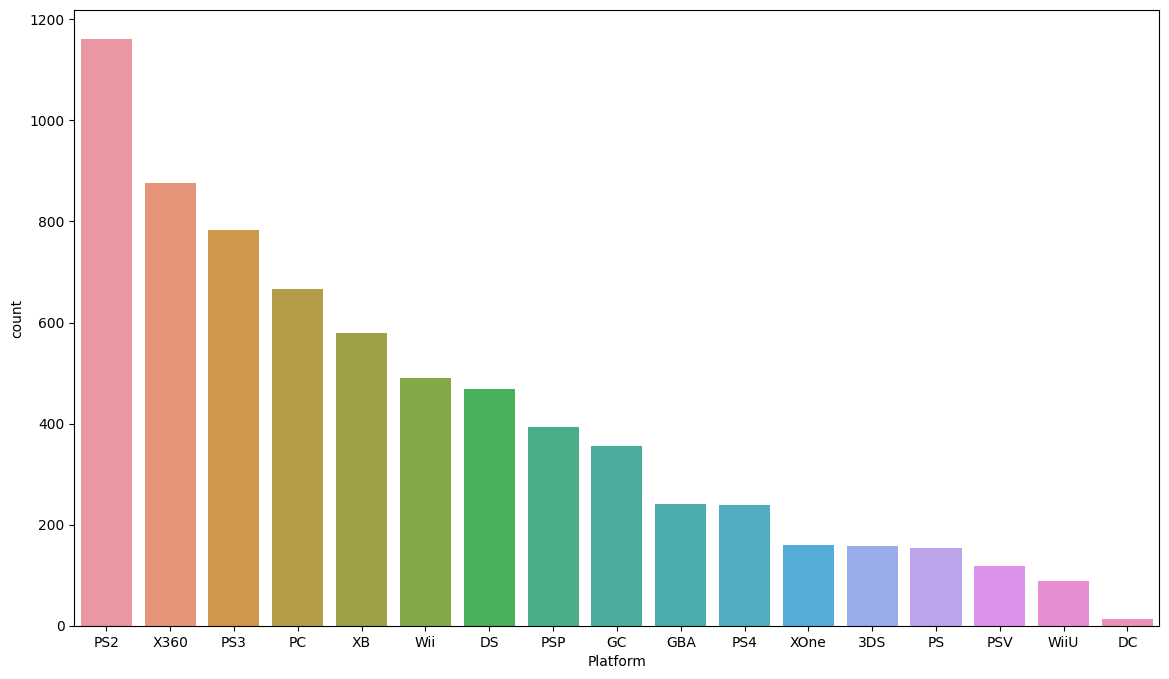

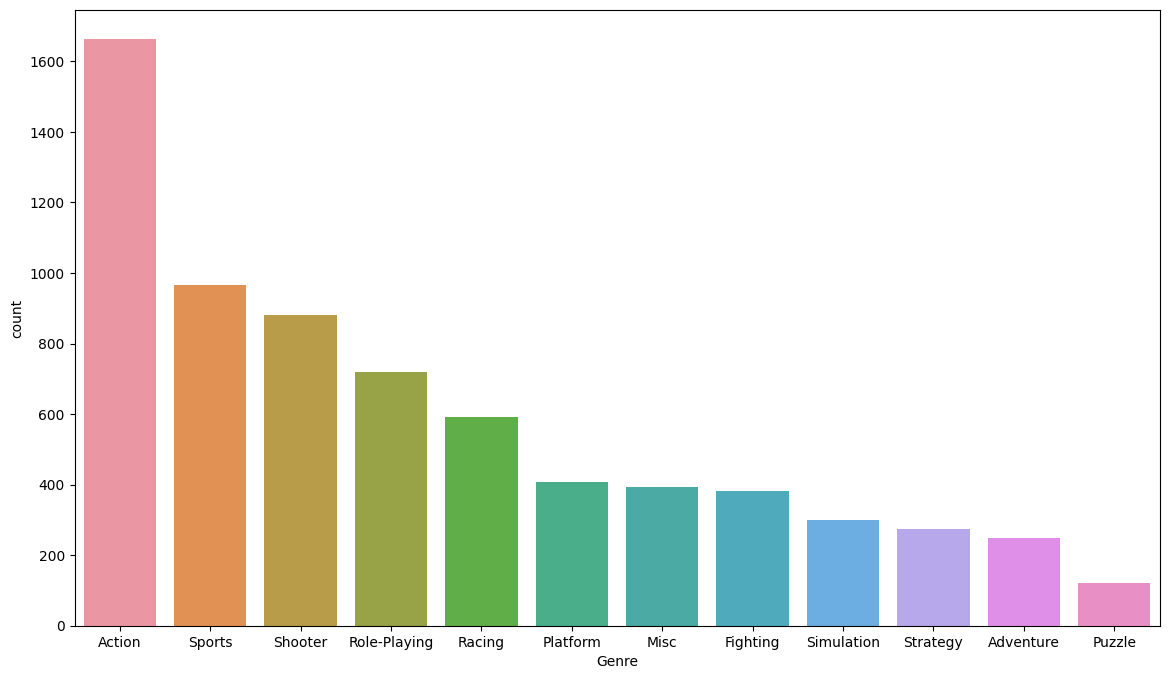

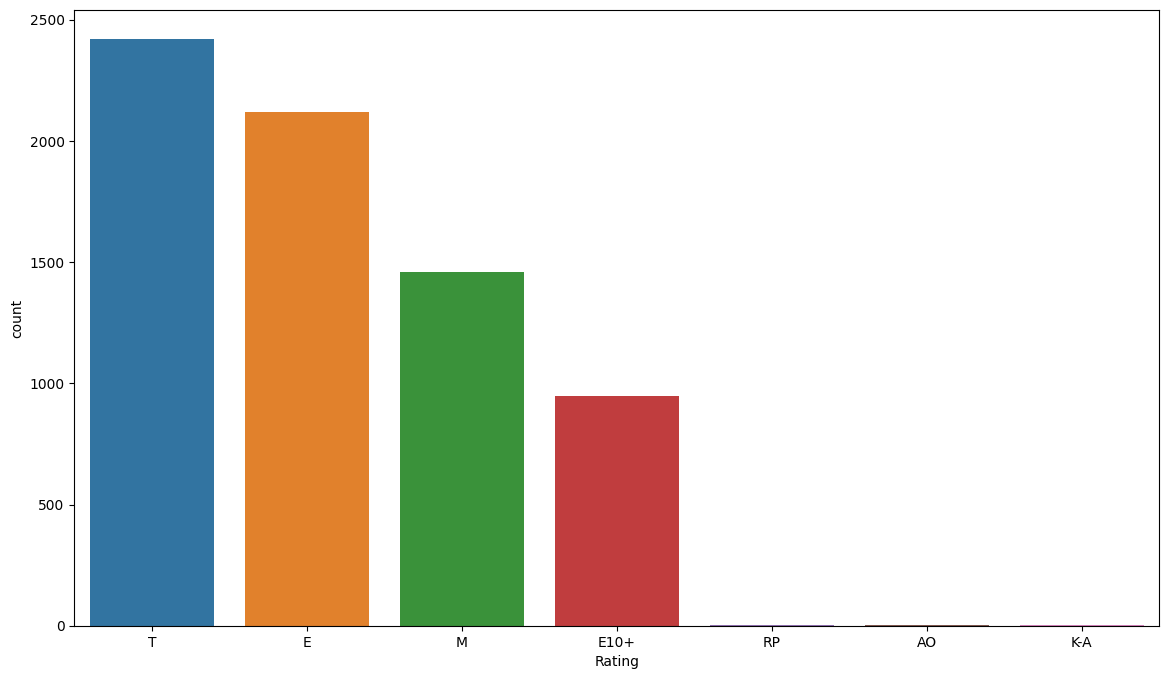

In [113]:
#Visualization of the data

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index)

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index)

In [ ]:
# One-hot encode categorical features
categorical_features = ["Platform", "Genre", "Rating"]
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_features]).toarray()

# Normalize numerical features
numerical_features = ["Critic_Score", "User_Score", "Global_Sales"]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[numerical_features])

# Combine all features into a single feature matrix
feature_matrix = np.hstack((encoded_features, normalized_features))

# Save the game names for later reference
game_names = df["Name"].values

In [104]:
similarity_matrix = cosine_similarity(feature_matrix)

def get_similar_games(game_name, game_names, similarity_matrix, top_n=5):
    # Find the index of the given game
    if game_name not in game_names:
        raise ValueError(f"Game '{game_name}' not found in the dataset.")
    
    game_idx = np.where(game_names == game_name)[0][0]
    
    # Get similarity scores for the game
    similarity_scores = similarity_matrix[game_idx]
    
    similar_game_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1] 

    # Get names of similar games
    similar_games = [(game_names[i], similarity_scores[i]) for i in similar_game_indices]
    return similar_games

In [118]:
# Example usage
game_input = input("Enter a game name: ")
similar_games = get_similar_games(game_input, game_names, similarity_matrix, top_n=10)
print(f"Games similar to '{game_input}':")
for game, score in similar_games:
    print(f"- {game} (Similarity: {score:.5f})")

Games similar to 'Grand Theft Auto V':
- Grand Theft Auto IV (Similarity: 0.99774)
- Red Dead Redemption (Similarity: 0.99622)
- Metal Gear Solid 4: Guns of the Patriots (Similarity: 0.99605)
- Assassin's Creed II (Similarity: 0.99559)
- The Last of Us (Similarity: 0.99542)
- God of War III (Similarity: 0.99524)
- Assassin's Creed IV: Black Flag (Similarity: 0.99445)
- Assassin's Creed: Brotherhood (Similarity: 0.99430)
- Resident Evil 5 (Similarity: 0.99394)
- God of War Collection (Similarity: 0.99390)
